In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
from nilearn import plotting

In [2]:
import nibabel as nib
import numpy as np

In [3]:
from xml.etree import ElementTree

In [4]:
#Load one subject

t1w_im = nib.load('../../data_local/HCP/100206/T1w/T1w_acpc_dc_restore_brain.nii.gz')
labels_im = nib.load('../../data_local/HCP/100206/T1w/aparc.a2009s+aseg.nii.gz')

In [5]:
#Get the label names and colors from the header extension

extension_header = ElementTree.fromstring(
    labels_im.header.extensions[0].get_content()
)

labeltable = {
    l.text: int(l.get('Key'))
    for l in extension_header.findall(".//Label")
}

label_colors = {
    int(l.get('Key')): tuple(
        float(l.get(c))
        for c in ('Red', 'Green', 'Blue')
    )
    for l in extension_header.findall(".//Label")
}

labels = labels_im.get_data()

destrieux_cm = mpl.colors.ListedColormap(
    np.array([
        label_colors.get(i, (0., 0., 0.))
        for i in range(max(label_colors) + 1)
    ]),
    name='Destrieux'
)

/home/tom/.local/miniconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


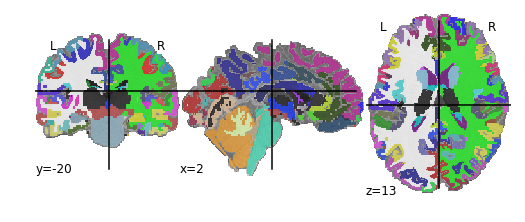

In [6]:
plotting.plot_roi(
    roi_img=labels_im,
    bg_img=t1w_im,
    cmap=destrieux_cm, 
    black_bg=False,
    vmin=0, vmax=max(label_colors) + 1
)

In [7]:
#Filtering only the labels that are Sulci, our goal for detection

sulci_labels = {
    k: v
    for k, v in labeltable.items()
    if '_S_' in k and '_G_' not in k
}
sulci_labels

{'CTX_LH_S_CALCARINE': 11145,
 'CTX_LH_S_CENTRAL': 11146,
 'CTX_LH_S_CINGUL-MARGINALIS': 11147,
 'CTX_LH_S_CIRCULAR_INSULA_ANT': 11148,
 'CTX_LH_S_CIRCULAR_INSULA_INF': 11149,
 'CTX_LH_S_CIRCULAR_INSULA_SUP': 11150,
 'CTX_LH_S_COLLAT_TRANSV_ANT': 11151,
 'CTX_LH_S_COLLAT_TRANSV_POST': 11152,
 'CTX_LH_S_FRONT_INF': 11153,
 'CTX_LH_S_FRONT_MIDDLE': 11154,
 'CTX_LH_S_FRONT_SUP': 11155,
 'CTX_LH_S_INTERM_PRIM-JENSEN': 11156,
 'CTX_LH_S_INTRAPARIET_AND_P_TRANS': 11157,
 'CTX_LH_S_OC_MIDDLE_AND_LUNATUS': 11158,
 'CTX_LH_S_OC_SUP_AND_TRANSVERSAL': 11159,
 'CTX_LH_S_OCCIPITAL_ANT': 11160,
 'CTX_LH_S_OC-TEMP_LAT': 11161,
 'CTX_LH_S_OC-TEMP_MED_AND_LINGUAL': 11162,
 'CTX_LH_S_ORBITAL_LATERAL': 11163,
 'CTX_LH_S_ORBITAL_MED-OLFACT': 11164,
 'CTX_LH_S_ORBITAL-H_SHAPED': 11165,
 'CTX_LH_S_PARIETO_OCCIPITAL': 11166,
 'CTX_LH_S_PERICALLOSAL': 11167,
 'CTX_LH_S_POSTCENTRAL': 11168,
 'CTX_LH_S_PRECENTRAL-INF-PART': 11169,
 'CTX_LH_S_PRECENTRAL-SUP-PART': 11170,
 'CTX_LH_S_SUBORBITAL': 11171,
 'CTX_LH_S

In [8]:
sulci_masks = np.zeros_like(labels_im.get_data(), dtype=np.int32)
for label in sulci_labels.values():
    mask = (labels == label)
    sulci_masks[mask] = label

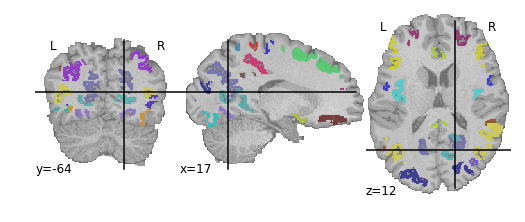

In [9]:
plotting.plot_roi(
    nib.spatialimages.SpatialImage(sulci_masks, labels_im.affine),
    bg_img=t1w_im,
    cmap=destrieux_cm,
    black_bg=False, vmin=0, vmax=max(label_colors) + 1
)

In [10]:
labeltable

{'???': 0,
 'LEFT-CEREBRAL-WHITE-MATTER': 2,
 'LEFT-LATERAL-VENTRICLE': 4,
 'LEFT-INF-LAT-VENT': 5,
 'LEFT-CEREBELLUM-WHITE-MATTER': 7,
 'LEFT-CEREBELLUM-CORTEX': 8,
 'LEFT-THALAMUS-PROPER': 10,
 'LEFT-CAUDATE': 11,
 'LEFT-PUTAMEN': 12,
 'LEFT-PALLIDUM': 13,
 '3RD-VENTRICLE': 14,
 '4TH-VENTRICLE': 15,
 'BRAIN-STEM': 16,
 'LEFT-HIPPOCAMPUS': 17,
 'LEFT-AMYGDALA': 18,
 'CSF': 24,
 'LEFT-ACCUMBENS-AREA': 26,
 'LEFT-VENTRALDC': 28,
 'LEFT-VESSEL': 30,
 'LEFT-CHOROID-PLEXUS': 31,
 'RIGHT-CEREBRAL-WHITE-MATTER': 41,
 'RIGHT-LATERAL-VENTRICLE': 43,
 'RIGHT-INF-LAT-VENT': 44,
 'RIGHT-CEREBELLUM-WHITE-MATTER': 46,
 'RIGHT-CEREBELLUM-CORTEX': 47,
 'RIGHT-THALAMUS-PROPER': 49,
 'RIGHT-CAUDATE': 50,
 'RIGHT-PUTAMEN': 51,
 'RIGHT-PALLIDUM': 52,
 'RIGHT-HIPPOCAMPUS': 53,
 'RIGHT-AMYGDALA': 54,
 'RIGHT-ACCUMBENS-AREA': 58,
 'RIGHT-VENTRALDC': 60,
 'RIGHT-VESSEL': 62,
 'RIGHT-CHOROID-PLEXUS': 63,
 'WM-HYPOINTENSITIES': 77,
 'NON-WM-HYPOINTENSITIES': 80,
 'OPTIC-CHIASM': 85,
 'CC_POSTERIOR': 251,
 'CC_